In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spx = yf.Ticker("^GSPC")
spx_data = spx.history(period="730d", interval="1h")  # Fetch hourly data for the last 730 days

In [3]:
# Convert to pandas DataFrame and set Datetime as index
spx_df = pd.DataFrame(spx_data)
spx_df.index = pd.to_datetime(spx_df.index)
spx_df.reset_index(inplace=True)
spx_df.set_index('Datetime', inplace=True)

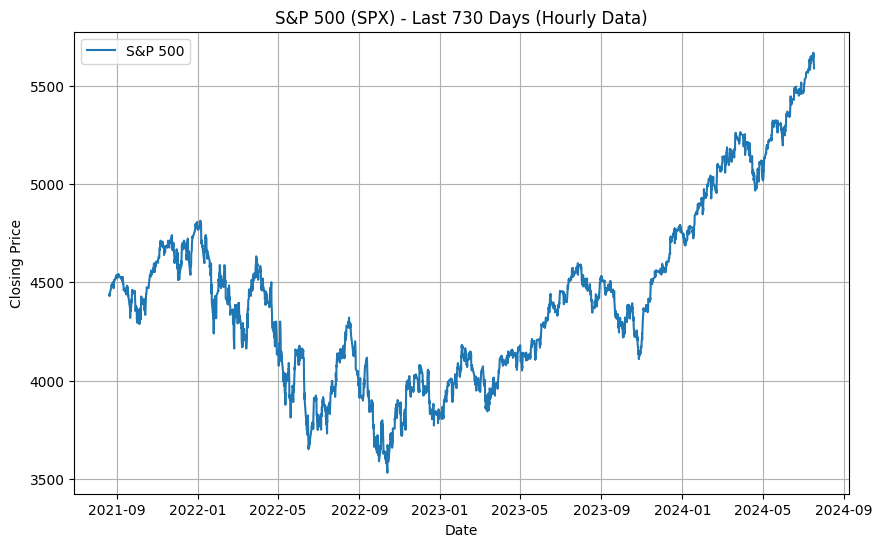

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(spx_df.index, spx_df['Close'], label='S&P 500')
plt.title('S&P 500 (SPX) - Last 730 Days (Hourly Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
spx_df = pd.DataFrame(spx_data)
spx_df.head(20)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-08-20 09:30:00-04:00,4410.560059,4436.709961,4406.799805,4433.200195,0,0.0,0.0
1,2021-08-20 10:30:00-04:00,4433.169922,4437.459961,4428.089844,4429.589844,239539623,0.0,0.0
2,2021-08-20 11:30:00-04:00,4429.560059,4439.500000,4427.540039,4439.500000,178097545,0.0,0.0
3,2021-08-20 12:30:00-04:00,4439.549805,4442.830078,4439.339844,4439.839844,142016808,0.0,0.0
4,2021-08-20 13:30:00-04:00,4439.819824,4440.790039,4433.399902,4434.560059,155445979,0.0,0.0
5,2021-08-20 14:30:00-04:00,4434.529785,4441.399902,4432.629883,4441.399902,174802000,0.0,0.0
6,2021-08-20 15:30:00-04:00,4441.399902,4444.350098,4439.689941,4441.200195,280874000,0.0,0.0
7,2021-08-23 09:30:00-04:00,4450.290039,4479.930176,4450.290039,4476.600098,0,0.0,0.0
8,2021-08-23 10:30:00-04:00,4476.640137,4484.779785,4474.859863,4482.319824,234992898,0.0,0.0
9,2021-08-23 11:30:00-04:00,4482.319824,4486.919922,4482.290039,4486.399902,177948337,0.0,0.0


In [6]:
spx_df.dtypes


Datetime        datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

In [7]:
spx_df['Datetime'] = pd.to_datetime(spx_df['Datetime'])
spx_df.set_index('Datetime', inplace=True)

# Extract the Open price at 09:30
df_open_0930 = spx_df[spx_df.index.strftime('%H:%M') == '09:30'][['Open']]
df_open_0930 = df_open_0930.rename(columns={'Open': 'Open_0930'})

# Shift the Close column to get the previous day's close
spx_df['Close_prev_day'] = spx_df['Close'].shift(1)

# Merge the Open price at 09:30 with the previous day's close
merged_df = df_open_0930.merge(spx_df[['Close_prev_day']], left_index=True, right_index=True)


In [8]:
merged_df['Gap'] = merged_df['Open_0930'] - merged_df['Close_prev_day']
merged_df['Gap_abs'] = merged_df['Gap'].abs()
merged_df['Gap_abs'] =round(merged_df['Gap_abs'],2)
# Calculate the gap as a percentage of the previous day's close
merged_df['Gap_pct'] = (merged_df['Gap'] / merged_df['Close_prev_day']) * 100
merged_df['Gap_pct'] = round(merged_df['Gap_pct'], 2)
merged_df.head(30)

,Open_0930,Close_prev_day,Gap,Gap_abs,Gap_pct
Datetime,,,,,
2021-08-20 09:30:00-04:00,4410.560059,NaN,NaN,NaN,NaN
2021-08-23 09:30:00-04:00,4450.290039,4441.200195,9.089844,9.09,0.20
2021-08-24 09:30:00-04:00,4484.399902,4479.089844,5.310059,5.31,0.12
2021-08-25 09:30:00-04:00,4490.450195,4486.229980,4.220215,4.22,0.09
2021-08-26 09:30:00-04:00,4493.750000,4496.149902,-2.399902,2.40,-0.05
2021-08-27 09:30:00-04:00,4474.100098,4469.709961,4.390137,4.39,0.10
2021-08-30 09:30:00-04:00,4513.759766,4508.709961,5.049805,5.05,0.11
2021-08-31 09:30:00-04:00,4529.750000,4528.350098,1.399902,1.40,0.03
2021-09-01 09:30:00-04:00,4528.799805,4522.450195,6.349609,6.35,0.14


In [9]:
# Calculate and print max, min, and average of Gap
Gap_max = round(merged_df['Gap_abs'].max(),2)
Gap_min = round(merged_df['Gap_abs'].min(),2)
avg_gap = round(merged_df['Gap_abs'].mean(),2)

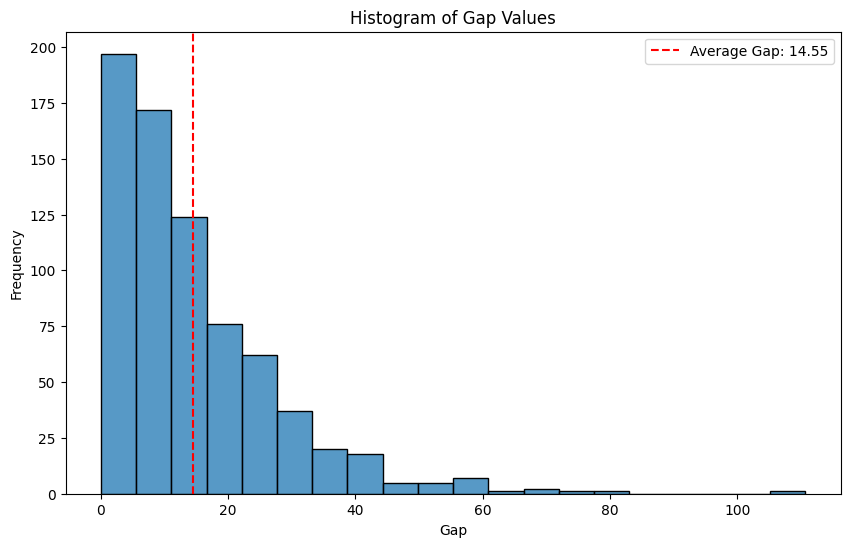

In [10]:
import seaborn as sns
# Plot histogram of the gap values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Gap_abs'], bins=20, kde=False)
plt.title('Histogram of Gap Values')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.axvline(avg_gap, color='r', linestyle='--', label=f'Average Gap: {avg_gap:.2f}')
plt.legend()
plt.show()

In [11]:
avg_gap_abs = merged_df['Gap_abs'].mean()
merged_df['above'] = merged_df['Gap_abs'] >= avg_gap_abs
# Print the count of Gap_abs values greater than or equal to the average gap
count_above_avg = merged_df['above'].sum()

In [12]:
print(f"Total días estudiados: {len(merged_df)}")
print(f"Días con Gaps por encima de la media: {count_above_avg}")
print(f"Max Gap: {Gap_max}")
print(f"Average Gap: {avg_gap}")
print(f"Min Gap: {Gap_min}")
coste = len(merged_df) * 0.20
beneficio = count_above_avg * 0.6
neto = beneficio-coste
print(f"Compramos cada día un Strangle al cierre de mercado con un coste de {coste}")
print(f"Con los dias que van bien, obtenemos un beneficio de  {beneficio}")
print(f"El resultado neto es de: {neto}€")

Total días estudiados: 730
Días con Gaps por encima de la media: 279
Max Gap: 110.73
Average Gap: 14.55
Min Gap: 0.01
Compramos cada día un Strangle al cierre de mercado con un coste de 146.0
Con los dias que van bien, obtenemos un beneficio de  167.4
El resultado neto es de: 21.400000000000006€


In [13]:
df_gap = merged_df[merged_df['above']]
df_gap

,Open_0930,Close_prev_day,Gap,Gap_abs,Gap_pct,above
Datetime,,,,,,
2021-09-13 09:30:00-04:00,4474.810059,4459.160156,15.649902,15.65,0.35,True
2021-09-20 09:30:00-04:00,4402.950195,4433.189941,-30.239746,30.24,-0.68,True
2021-09-21 09:30:00-04:00,4374.450195,4357.979980,16.470215,16.47,0.38,True
2021-09-28 09:30:00-04:00,4419.540039,4443.589844,-24.049805,24.05,-0.54,True
2021-10-06 09:30:00-04:00,4319.569824,4345.200195,-25.630371,25.63,-0.59,True
...,...,...,...,...,...,...
2024-06-05 09:30:00-04:00,5314.479980,5290.740234,23.739746,23.74,0.45,True
2024-06-12 09:30:00-04:00,5409.129883,5375.810059,33.319824,33.32,0.62,True
2024-06-13 09:30:00-04:00,5441.930176,5421.140137,20.790039,20.79,0.38,True


In [14]:
# Save the filtered DataFrame to a CSV file
df_gap.to_csv('gap_analysis_above_avg.csv', index=True)